In [1]:
import numpy as np #scientific computing
import pandas as pd #data management
import itertools

#matplotlib for plotting
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mtick #for percentage ticks

#Imbalancing
from imblearn.over_sampling import SMOTE

#Imputer
from sklearn.impute import SimpleImputer

#sklearn for modeling
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #Decision Tree algorithm
from sklearn.model_selection import train_test_split #Data split function
from sklearn.preprocessing import LabelEncoder #OneHotEncoding
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score



#Decision tree plot
import pydotplus
import seaborn as sns
from IPython.display import Image

#Models
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Loading the datasets

In [2]:
data = pd.read_csv("./aug_train.csv")

In [3]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

# Data Visualization

/Users/mohsinkhan/opt/anaconda3/envs/dsb/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


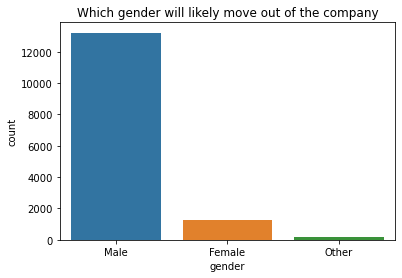

In [6]:
plt.title('Which gender will likely move out of the company')
sns.countplot(data['gender'])
plt.show()

Text(0.5, 1.0, 'Gender percentage looking for new job')

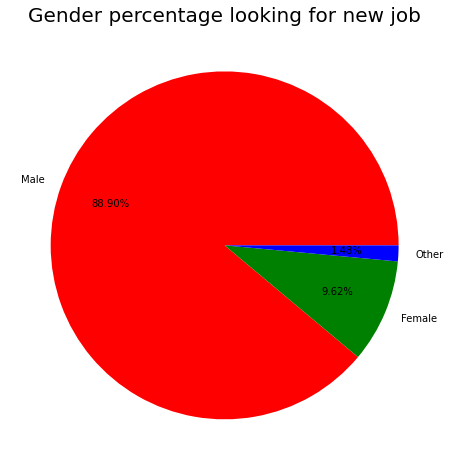

In [7]:
gender = data[data['target'] == 1]['gender']

gender_temp = gender.value_counts()
labels = gender_temp.keys()
bar,ax = plt.subplots(figsize=(8,8))
plt.pie(x = gender_temp, labels = labels , colors = ['red','green','blue'], 
   autopct="%.2f%%",pctdistance=0.7)

plt.title('Gender percentage looking for new job', fontsize=20)

/Users/mohsinkhan/opt/anaconda3/envs/dsb/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


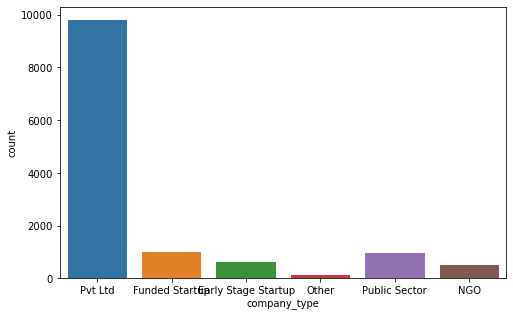

In [8]:
# From which company people are leaving and looking for a job the most

plt.figure(figsize=(8,5))
sns.countplot(data['company_type'])
plt.show()

Text(0.5, 1.0, 'People percentage leaving the company')

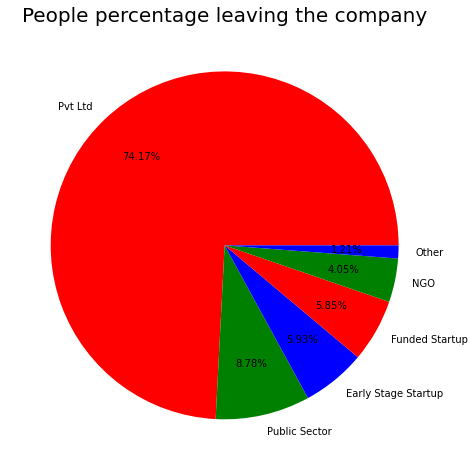

In [9]:
company = data[data['target'] == 1]['company_type']

company_temp = company.value_counts()
labels = company_temp.keys()
bar,ax = plt.subplots(figsize=(8,8))
plt.pie(x = company_temp, labels = labels , colors = ['red','green','blue'], 
   autopct="%.2f%%",pctdistance=0.7)

plt.title('People percentage leaving the company', fontsize=20)

/Users/mohsinkhan/opt/anaconda3/envs/dsb/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='relevent_experience', ylabel='count'>

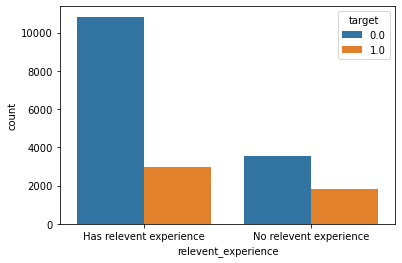

In [10]:
# Relevant Experience
sns.countplot(data['relevent_experience'], hue=data['target'])

/Users/mohsinkhan/opt/anaconda3/envs/dsb/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


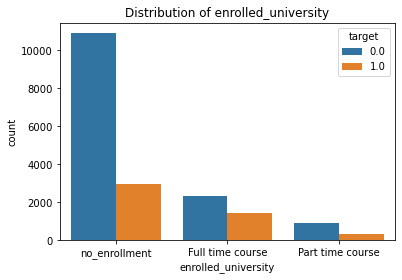

/Users/mohsinkhan/opt/anaconda3/envs/dsb/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


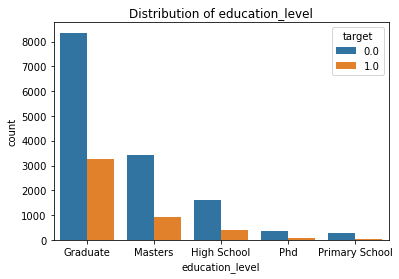

/Users/mohsinkhan/opt/anaconda3/envs/dsb/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


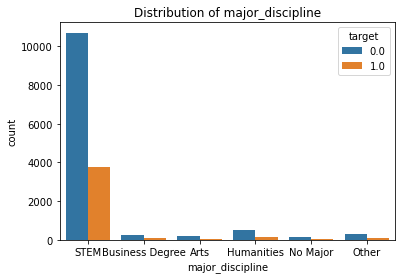

/Users/mohsinkhan/opt/anaconda3/envs/dsb/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


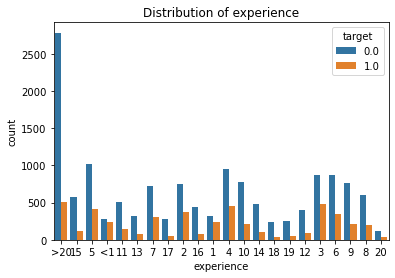

/Users/mohsinkhan/opt/anaconda3/envs/dsb/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


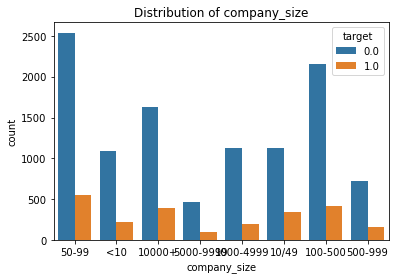

/Users/mohsinkhan/opt/anaconda3/envs/dsb/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


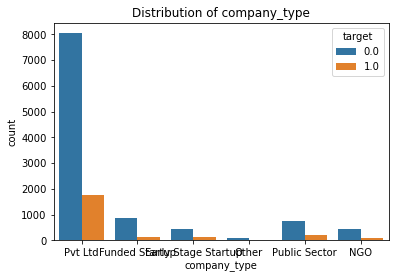

/Users/mohsinkhan/opt/anaconda3/envs/dsb/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


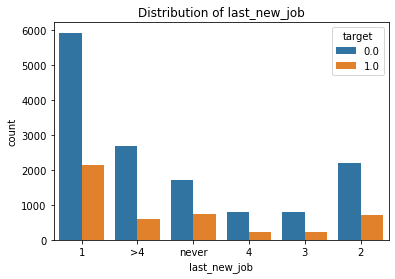

In [11]:
categorical_cols_to_distribute = ['enrolled_university', 'education_level', 'major_discipline', 
                                  'experience', 'company_size', 'company_type', 'last_new_job']

for col in data[categorical_cols_to_distribute]:
    plt.title(f'Distribution of {col}')
    sns.countplot(data[col], hue=data['target'])
    plt.show()

/Users/mohsinkhan/opt/anaconda3/envs/dsb/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


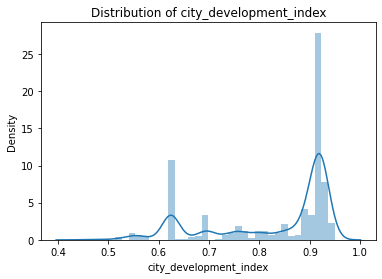

/Users/mohsinkhan/opt/anaconda3/envs/dsb/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


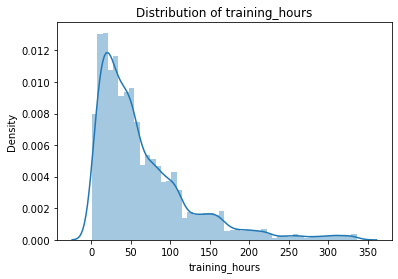

In [12]:
numeric_cols_to_distribute = ['city_development_index', 'training_hours']
for col in data[numeric_cols_to_distribute]:
    plt.title(f'Distribution of {col}')
    sns.distplot(data[col])
    plt.show()

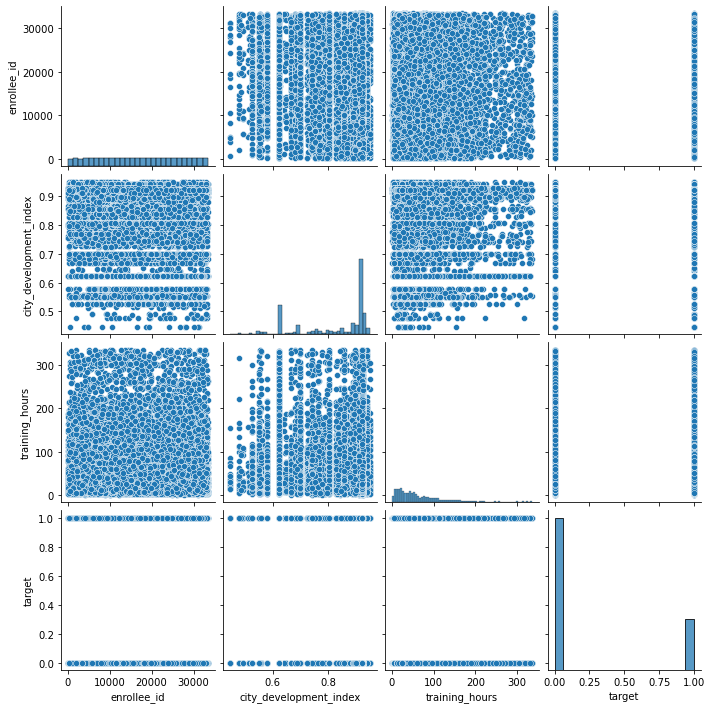

In [13]:
sns.pairplot(data)
plt.show()

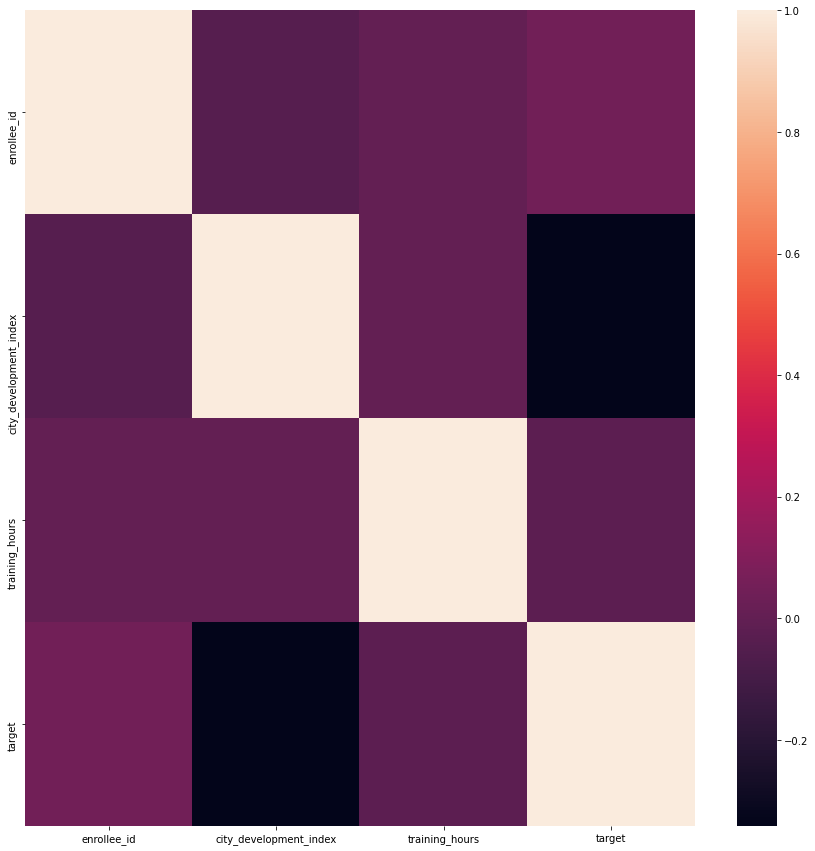

In [14]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr())
plt.show()

# Preprocessing Data

In [15]:
data.isnull().sum()
data = data.dropna()

In [16]:
gender_map = {
        'Female': 2,
        'Male': 1,
        'Other': 0
         }

relevent_experience_map = {
    'Has relevent experience':  1,
    'No relevent experience':    0
}

enrolled_university_map = {
    'no_enrollment'   :  0,
    'Full time course':    1, 
    'Part time course':    2 
}
    
education_level_map = {
    'Primary School' :    0,
    'Graduate'       :    2,
    'Masters'        :    3, 
    'High School'    :    1, 
    'Phd'            :    4
    } 
    
major_map ={ 
    'STEM'                   :    0,
    'Business Degree'        :    1, 
    'Arts'                   :    2, 
    'Humanities'             :    3, 
    'No Major'               :    4, 
    'Other'                  :    5 
}
    
experience_map = {
    '<1'      :    0,
    '1'       :    1, 
    '2'       :    2, 
    '3'       :    3, 
    '4'       :    4, 
    '5'       :    5,
    '6'       :    6,
    '7'       :    7,
    '8'       :    8, 
    '9'       :    9, 
    '10'      :    10, 
    '11'      :    11,
    '12'      :    12,
    '13'      :    13, 
    '14'      :    14, 
    '15'      :    15, 
    '16'      :    16,
    '17'      :    17,
    '18'      :    18,
    '19'      :    19, 
    '20'      :    20, 
    '>20'     :    21
} 
    
company_type_map = {
    'Pvt Ltd'               :    0,
    'Funded Startup'        :    1, 
    'Early Stage Startup'   :    2, 
    'Other'                 :    3, 
    'Public Sector'         :    4, 
    'NGO'                   :    5
}

company_size_map = {
    '<10'          :    0,
    '10/49'        :    1, 
    '100-500'      :    2, 
    '1000-4999'    :    3, 
    '10000+'       :    4, 
    '50-99'        :    5, 
    '500-999'      :    6, 
    '5000-9999'    :    7
}
    
last_new_job_map = {
    'never'        :    0,
    '1'            :    1, 
    '2'            :    2, 
    '3'            :    3, 
    '4'            :    4, 
    '>4'           :    5
}

In [17]:
data.loc[:,'education_level'] = data['education_level'].map(education_level_map)
data.loc[:,'company_size'] = data['company_size'].map(company_size_map)
data.loc[:,'company_type'] = data['company_type'].map(company_type_map)
data.loc[:,'last_new_job'] = data['last_new_job'].map(last_new_job_map)
data.loc[:,'major_discipline'] = data['major_discipline'].map(major_map)
data.loc[:,'enrolled_university'] = data['enrolled_university'].map(enrolled_university_map)
data.loc[:,'relevent_experience'] = data['relevent_experience'].map(relevent_experience_map)
data.loc[:,'gender'] = data['gender'].map(gender_map)
data.loc[:,'experience'] = data['experience'].map(experience_map)

# encoding city feature using label encoder
lb_en = LabelEncoder()

data.loc[:,'city'] = lb_en.fit_transform(data.loc[:,'city']) 

In [18]:
# train = data[['city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours']]

In [19]:
# target = data[['target']]
train, target = data.loc[:, data.columns != 'target'], data['target'] #define feature matrix X and labels y
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.3, random_state = 12345) #split data 70:30

In [20]:
# X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.30, random_state=101)

In [21]:
X_train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
18673,21882,30,0.836,1,1,0,3,0,11,4,0,1,8
4057,2162,107,0.925,1,1,0,2,2,20,5,0,2,4
3497,6789,33,0.763,1,0,1,2,0,5,6,0,1,44
4670,16443,60,0.624,1,1,1,2,0,3,4,0,1,106
4922,14141,5,0.920,1,1,0,2,0,2,0,0,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9489,1065,29,0.897,1,1,0,3,0,6,2,5,1,34
8722,25337,4,0.804,1,1,0,3,0,11,5,0,1,154
7361,30527,5,0.920,1,1,0,2,0,21,3,4,1,139
4545,2807,46,0.910,1,1,0,2,0,10,5,0,1,26


In [22]:
y_train

18673    0.0
4057     0.0
3497     0.0
4670     0.0
4922     0.0
        ... 
9489     1.0
8722     0.0
7361     0.0
4545     0.0
9694     0.0
Name: target, Length: 6268, dtype: float64

# Model Training and Accuracy

In [23]:
def feature_importance(model):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    feature_order = np.array([train.columns.values])
    i = np.argsort(importances)[::-1]
    feature_order = feature_order[:,i]
    plt.figure()
    plt.title("Relative feature importances")
    plt.bar(range(train.shape[1]), importances[indices],color="b",  align="center")
    plt.xticks(range(train.shape[1]), feature_order[0], rotation=90)
    plt.xlim([-1, train.shape[1]])
    plt.show()

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylim([1.5, -0.5]) #added to fix a bug that causes the matrix to be squished
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
    

## Decision Tree

F1 score is:  0.5088607594936709
Accuracy is:  85.56


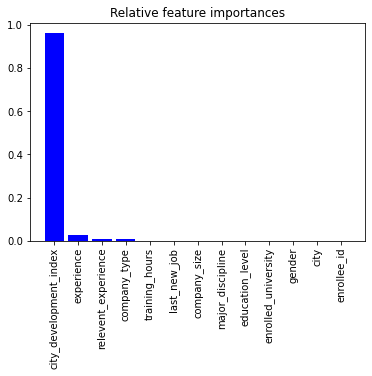

In [25]:
#Define Decision tree classifier with some default parameters
clf = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=3)

#Fit the training data 
clf.fit(X_train, y_train)

pred_DT = clf.predict(X_test)
pred_DT_probs = clf.predict_proba(X_test)
print ("F1 score is: ", (f1_score(y_test,pred_DT)))
# clf.score(X_test, y_test)
print ("Accuracy is: ", (accuracy_score(y_test,pred_DT)*100).round(2))

feature_importance(clf)

## Logistic Regression

F1 score is:  0.0
Accuracy is:  83.55


/Users/mohsinkhan/opt/anaconda3/envs/dsb/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


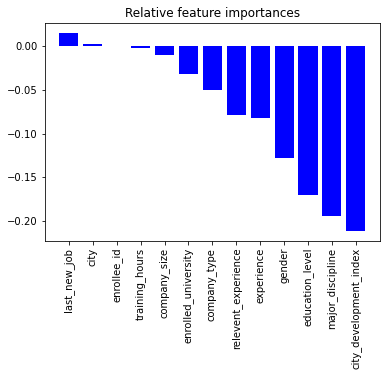

In [26]:
lr_imb = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
y_pred_lr_imb = lr_imb.predict(X_test)
y_predProba_lr_imb = lr_imb.predict_proba(X_test)
print ("F1 score is: ", (f1_score(y_test,y_pred_lr_imb)))
print ("Accuracy is: ", (accuracy_score(y_test, y_pred_lr_imb)*100).round(2))

importances = lr_imb.coef_[0]
indices = np.argsort(importances)[::-1]
feature_order = np.array([train.columns.values])
i = np.argsort(importances)[::-1]
feature_order = feature_order[:,i]
plt.figure()
plt.title("Relative feature importances")
plt.bar(range(train.shape[1]), importances[indices],color="b",  align="center")
plt.xticks(range(train.shape[1]), feature_order[0], rotation=90)
plt.xlim([-1, train.shape[1]])
plt.show()

## XGBClassifier

/Users/mohsinkhan/opt/anaconda3/envs/dsb/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:34:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


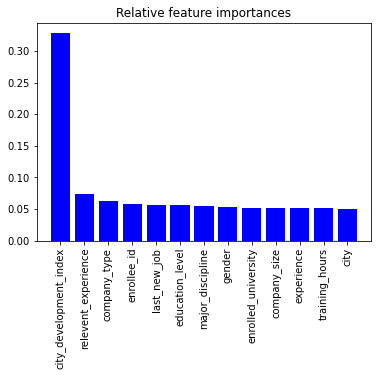

F1 score is:  0.43142857142857144
Accuracy is:  85.19


In [27]:
model = XGBClassifier().fit(X_train, y_train)

pred_XGB = model.predict(X_test)
pred_XGB_prob = model.predict_proba(X_test)
feature_importance(model)

print ("F1 score is: ", (f1_score(y_test,pred_XGB)))
print ("Accuracy is: ", (accuracy_score(y_test,pred_XGB)*100).round(2))
# model.score(X_test, y_test)

## Naive bayes

In [28]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

pred_nb = model_nb.predict(X_test)
pred_NB_prob = model_nb.predict_proba(X_test)

print ("F1 score is: ", (f1_score(y_test,pred_nb)))
print ("Accuracy is: ", (accuracy_score(y_test,pred_nb)*100).round(2))
# model_nb.score(X_test, y_test)

F1 score is:  0.15300546448087432
Accuracy is:  82.69


## SVC

In [29]:
model_svc = SVC(kernel = "poly", probability=True)
model_svc.fit(X_train, y_train)

pred_svc = model_svc.predict(X_test)
pred_svc_prob = model_svc.predict_proba(X_test)

print ("F1 score is: ", (f1_score(y_test,pred_svc)))
print ("Accuracy is: ", (accuracy_score(y_test,pred_svc)*100).round(2))
# model_svc.score(X_test, y_test)

F1 score is:  0.0
Accuracy is:  83.55


## Random Forest

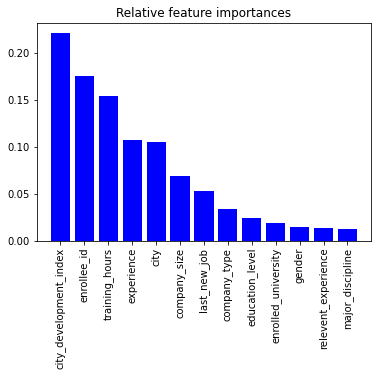

F1 score is:  0.4180790960451977
Accuracy is:  84.67


In [30]:
model_rf = RandomForestClassifier(n_estimators=50, random_state=1, n_jobs=-1).fit(X_train, y_train)

pred_rf = model_rf.predict(X_test)
pred_RF_prob = model_rf.predict_proba(X_test)
feature_importance(model_rf)

print ("F1 score is: ", (f1_score(y_test,pred_rf)))
print ("Accuracy is: ", (accuracy_score(y_test,pred_rf)*100).round(2))
# model_rf.score(X_test, y_test)

## Ensemble

In [31]:
model_voting = VotingClassifier(
    estimators=[
        ('rf', model_rf),
        ('svc', model_svc),
        ('gnb', model_nb),
        ('xgb', model),
    ],voting='soft')

pipe = make_pipeline(
    SimpleImputer(),
    model_voting
)


pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
y_pred_prob = pipe.predict_proba(X_test)

print ("F1 score is: ", (f1_score(y_test,y_pred)))
print ("Accuracy is: ", (accuracy_score(y_test,y_pred)*100).round(2))
# pipe.score(X_test, y_test)

/Users/mohsinkhan/opt/anaconda3/envs/dsb/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:34:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 score is:  0.18287937743190663
Accuracy is:  84.37


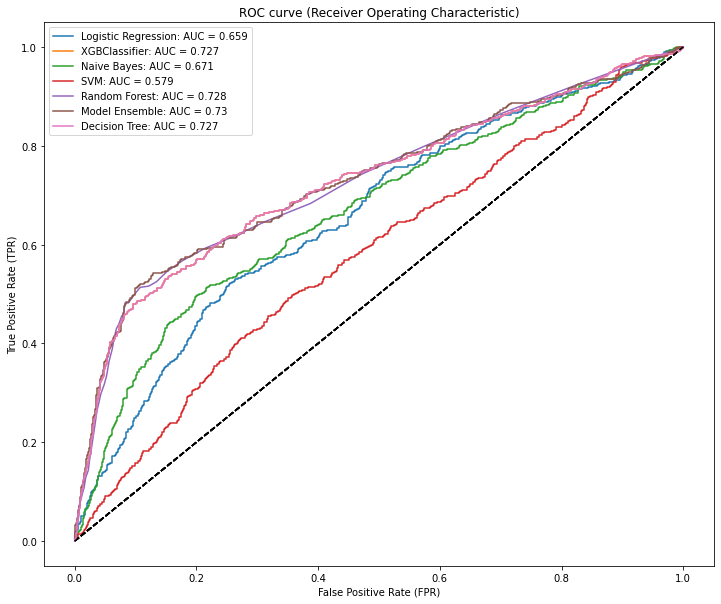

In [32]:
plt.figure(figsize=(12,10))

for test, pred, name in zip([y_test, y_test, y_test, y_test, y_test, y_test, y_test], [y_predProba_lr_imb[:,1], pred_XGB_prob[:,1], pred_NB_prob[:,1], pred_svc_prob[:,1], pred_RF_prob[:,1], y_pred_prob[:,1], pred_XGB_prob[:,1]], ['Logistic Regression','XGBClassifier', 'Naive Bayes','SVM', 'Random Forest','Model Ensemble', 'Decision Tree']):
    fpr, tpr, _ = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{}: AUC = {}'.format(name, round(roc_auc, 3)))
    plt.legend(loc='best')
    plt.plot([0,1],[0,1],color='black', linestyle='--')

plt.title('ROC curve (Receiver Operating Characteristic)')    
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')

plt.show()

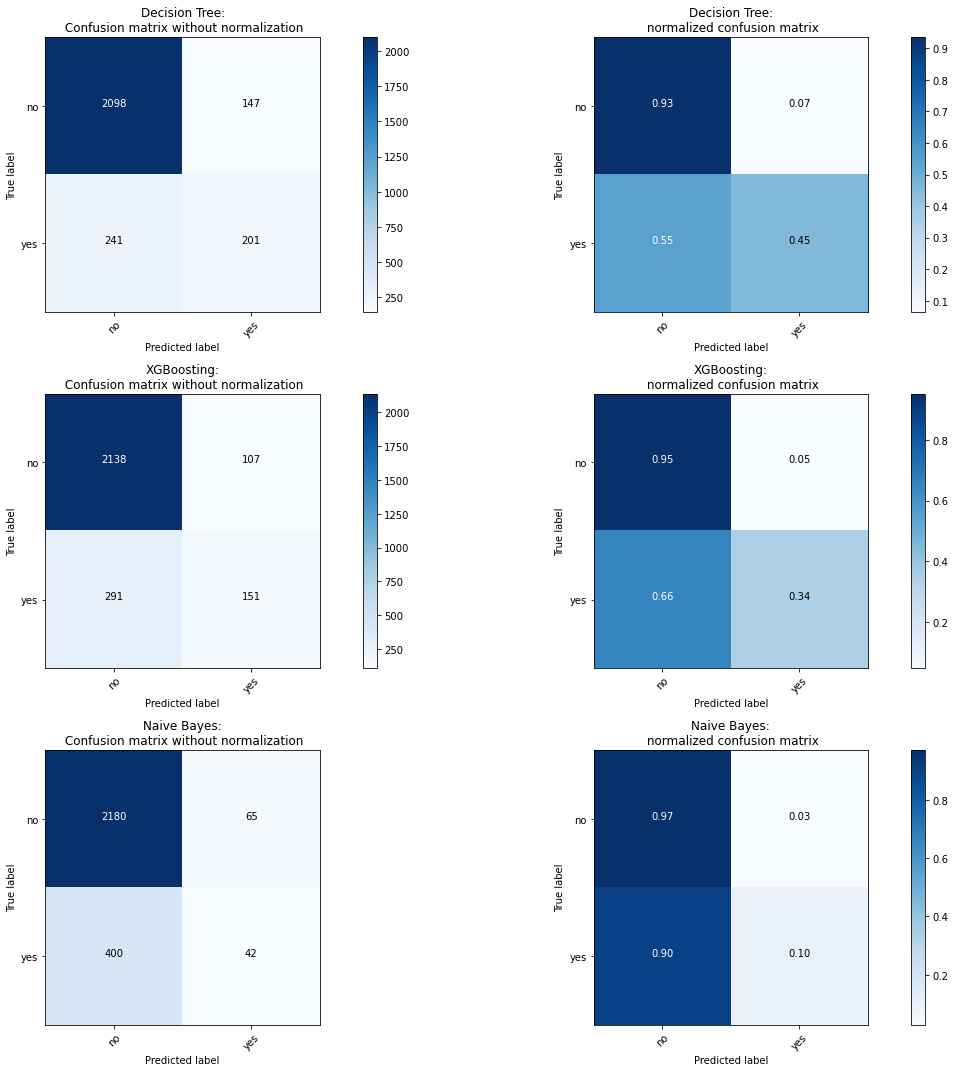

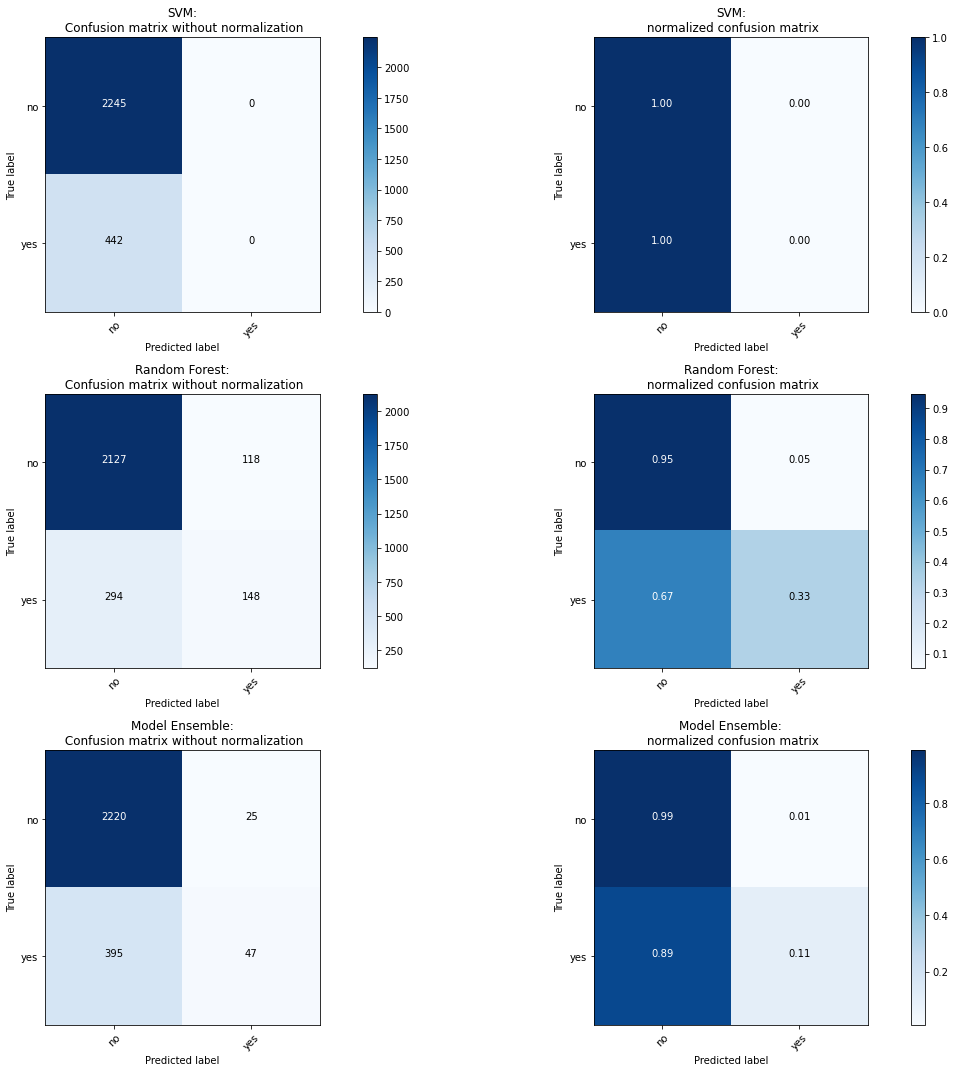

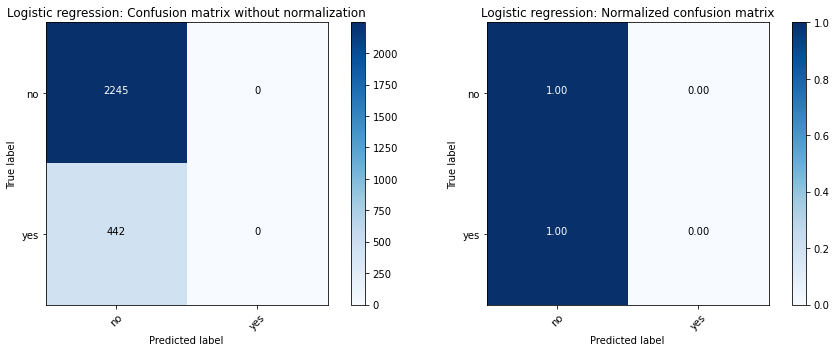

In [33]:
# Compute confusion matrix
class_names = ['no', 'yes']
cnf_matrix_clf = confusion_matrix(y_test, pred_DT)
cnf_matrix_XGB = confusion_matrix(y_test, pred_XGB) 
cnf_matrix_NB = confusion_matrix(y_test, pred_nb) 
cnf_matrix_svm = confusion_matrix(y_test, pred_svc)
cnf_matrix_RF = confusion_matrix(y_test, pred_rf)
cnf_matrix_ensemble = confusion_matrix(y_test, y_pred)

np.set_printoptions(precision=2)

plt.figure(figsize=(20, 15))

#Plot Decision Tree confusion matrix
plt.subplot(321) 
plot_confusion_matrix(cnf_matrix_clf, classes=class_names,
                      title='Decision Tree:\n Confusion matrix without normalization')

#Plot Decision Tree normalized confusion matrix
plt.subplot(322) 
plot_confusion_matrix(cnf_matrix_clf, classes=class_names, normalize=True,
                      title='Decision Tree:\n normalized confusion matrix')


#Plot XGB confusion matrix
plt.subplot(323) 
plot_confusion_matrix(cnf_matrix_XGB, classes=class_names,
                      title='XGBoosting:\n Confusion matrix without normalization')

#Plot XGB normalized onfusion matrix
plt.subplot(324) 
plot_confusion_matrix(cnf_matrix_XGB, classes=class_names, normalize=True,
                      title='XGBoosting:\n normalized confusion matrix')

#Plot Naive Bayes confusion matrix
plt.subplot(325) 
plot_confusion_matrix(cnf_matrix_NB, classes=class_names,
                      title='Naive Bayes:\n Confusion matrix without normalization')

#Plot Naive Bayes normalized onfusion matrix
plt.subplot(326) 
plot_confusion_matrix(cnf_matrix_NB, classes=class_names, normalize=True,
                      title='Naive Bayes:\n normalized confusion matrix')
plt.show()

np.set_printoptions(precision=2)

plt.figure(figsize=(20, 15))

#Plot SVM confusion matrix
plt.subplot(321) 
plot_confusion_matrix(cnf_matrix_svm, classes=class_names,
                      title='SVM:\n Confusion matrix without normalization')

#Plot SVM normalized confusion matrix
plt.subplot(322) 
plot_confusion_matrix(cnf_matrix_svm, classes=class_names, normalize=True,
                      title='SVM:\n normalized confusion matrix')

#Plot RF confusion matrix
plt.subplot(323) 
plot_confusion_matrix(cnf_matrix_RF, classes=class_names,
                      title='Random Forest:\n Confusion matrix without normalization')

#Plot RF normalized confusion matrix
plt.subplot(324) 
plot_confusion_matrix(cnf_matrix_RF, classes=class_names, normalize=True,
                      title='Random Forest:\n normalized confusion matrix')

#Plot Model Ensemble confusion matrix
plt.subplot(325) 
plot_confusion_matrix(cnf_matrix_ensemble, classes=class_names,
                      title='Model Ensemble:\n Confusion matrix without normalization')

#Plot Model Ensemble normalized confusion matrix
plt.subplot(326) 
plot_confusion_matrix(cnf_matrix_ensemble, classes=class_names, normalize=True,
                      title='Model Ensemble:\n normalized confusion matrix')


plt.show()

cnf_matrix = confusion_matrix(y_test, y_pred_lr_imb)

# Plot non-normalized confusion matrix
plt.figure(figsize=(13, 5))
plt.subplot(121) 
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Logistic regression: Confusion matrix without normalization')

# Plot normalized confusion matrix
plt.subplot(122) 
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Logistic regression: Normalized confusion matrix')


plt.show()

# Rebalancing Data and testing models

In [73]:
# X_train, X_test, y_train, y_test
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
# smote = SMOTE(sampling_strategy='minority',random_state=12345)
smote = SVMSMOTE(sampling_strategy='minority',random_state=12345)
X_sm, y_sm = smote.fit_sample(X_train, y_train)

In [74]:
def plot_2d_space(X, y, label='Classes', title='x', xlabel='x', ylabel='y'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m, s=2
        )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc='upper right')

Original label Counter({0.0: 5227, 1.0: 1041})
SMOTE label Counter({0.0: 5227, 1.0: 5227})


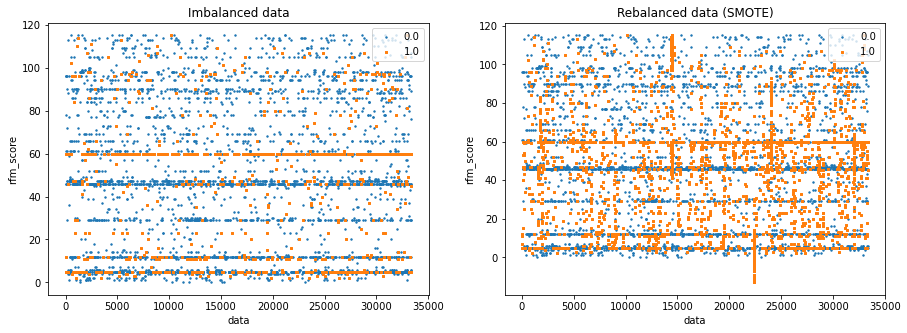

In [75]:
from collections import Counter

print('Original label %s' % Counter(y_train))
print('SMOTE label %s' % Counter(y_sm))

fig = plt.figure(figsize=(15, 5)) #specify figure size

ax0 = plt.subplot(121)
ax0 = plot_2d_space(np.array(X_train), y_train, title='Imbalanced data', xlabel='data', ylabel='rfm_score')

ax1 = plt.subplot(122)
ax1 = plot_2d_space(np.array(X_sm), y_sm, title='Rebalanced data (SMOTE)', xlabel='data', ylabel='rfm_score')

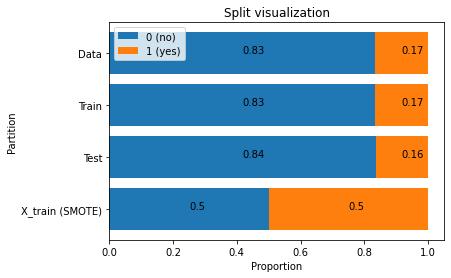

In [76]:
train_dist = y_train.value_counts() / len(y_train) #normalize absolute count values for plotting
test_dist = y_test.value_counts() / len(y_test)
data_dist = target.value_counts() / len(target)
smote_dist = pd.Series(y_sm).value_counts() / len(pd.Series(y_sm))

fig, ax = plt.subplots()

ax.barh(['X_train (SMOTE)','Test','Train','Data'], [smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], color='#1f77b4', label='0 (no)')
ax.barh(['X_train (SMOTE)','Test','Train','Data'], [smote_dist[1], test_dist[1], train_dist[1], data_dist[1]], left=[smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], color='#ff7f0e', label='1 (yes)')
ax.set_title('Split visualization')
ax.legend(loc='upper left')
plt.xlabel('Proportion')
plt.ylabel('Partition')

#plot bar values
for part, a, b in zip(['X_train (SMOTE)', 'Test', 'Train','Data'], [smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], [smote_dist[1], test_dist[1], train_dist[1], data_dist[1]]):
    plt.text(a/2, part, str(np.round(a, 2)))
    plt.text(b/2+a, part, str(np.round(b, 2)));

# Decision Tree Balanced

F1 score is:  0.4466192170818505
Accuracy is:  76.85


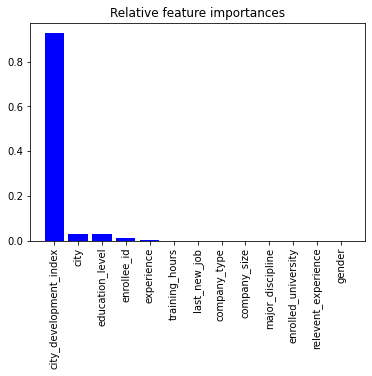

In [77]:
#Define Decision tree classifier with some default parameters
clf_bal = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=3).fit(X_sm, y_sm)

pred_DT_bal = clf_bal.predict(X_test)
pred_DT_probs_bal = clf.predict_proba(X_test)
print ("F1 score is: ", (f1_score(y_test,pred_DT_bal)))
# clf.score(X_test, y_test)
print ("Accuracy is: ", (accuracy_score(y_test,pred_DT_bal)*100).round(2))

feature_importance(clf_bal)

# Logistic Regression Balanced

F1 score is:  0.3465491923641704
Accuracy is:  66.88


/Users/mohsinkhan/opt/anaconda3/envs/dsb/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


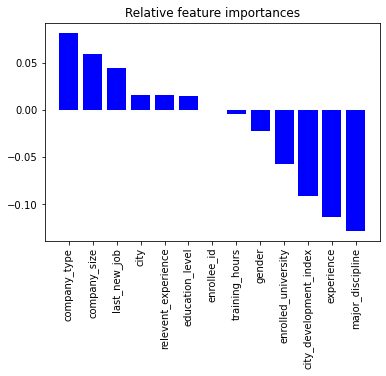

In [78]:
lr_bal = LogisticRegression(solver='lbfgs').fit(X_sm, y_sm)

y_pred_lr_bal = lr_bal.predict(X_test)
y_predProba_lr_bal = lr_bal.predict_proba(X_test)

print ("F1 score is: ", (f1_score(y_test,y_pred_lr_bal)))
print ("Accuracy is: ", (accuracy_score(y_test, y_pred_lr_bal)*100).round(2))

importances = lr_bal.coef_[0]
indices = np.argsort(importances)[::-1]
feature_order = np.array([train.columns.values])
i = np.argsort(importances)[::-1]
feature_order = feature_order[:,i]
plt.figure()
plt.title("Relative feature importances")
plt.bar(range(train.shape[1]), importances[indices],color="b",  align="center")
plt.xticks(range(train.shape[1]), feature_order[0], rotation=90)
plt.xlim([-1, train.shape[1]])
plt.show()

# XGBBoost Balanced

/Users/mohsinkhan/opt/anaconda3/envs/dsb/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:44:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


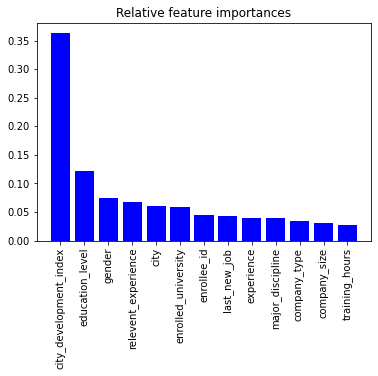

F1 score is:  0.4590570719602977
Accuracy is:  83.77


In [79]:
model_bal = XGBClassifier().fit(X_sm, y_sm)

pred_XGB_bal = model_bal.predict(X_test)
pred_XGB_prob_bal = model_bal.predict_proba(X_test)
feature_importance(model_bal)

print ("F1 score is: ", (f1_score(y_test,pred_XGB_bal)))
print ("Accuracy is: ", (accuracy_score(y_test,pred_XGB_bal)*100).round(2))
# model.score(X_test, y_test)

# Naive bayes balanced

In [80]:
model_nb_bal = GaussianNB().fit(X_sm, y_sm)

pred_nb_bal = model_nb_bal.predict(X_test)
pred_NB_prob_bal = model_nb.predict_proba(X_test)

print ("F1 score is: ", (f1_score(y_test,pred_nb_bal)))
print ("Accuracy is: ", (accuracy_score(y_test,pred_nb_bal)*100).round(2))
# model_nb.score(X_test, y_test)

F1 score is:  0.35698610095098765
Accuracy is:  67.29


# SVC balanced

In [81]:
model_svc_bal = SVC(kernel = "poly", probability=True).fit(X_sm, y_sm)

pred_svc_bal = model_svc_bal.predict(X_test)
pred_svc_prob_bal = model_svc_bal.predict_proba(X_test)

print ("F1 score is: ", (f1_score(y_test,pred_svc_bal)))
print ("Accuracy is: ", (accuracy_score(y_test,pred_svc_bal)*100).round(2))
# model_svc.score(X_test, y_test)

F1 score is:  0.2656376929325751
Accuracy is:  32.71


# Random Forest Balance

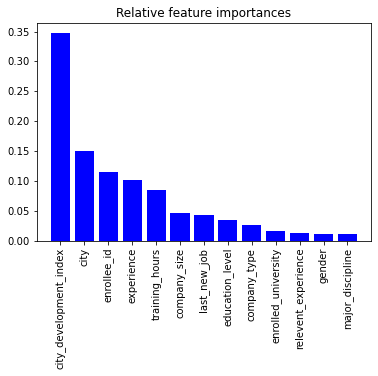

F1 score is:  0.47607361963190187
Accuracy is:  84.11


In [82]:
model_rf_bal = RandomForestClassifier(n_estimators=50, random_state=1, n_jobs=-1).fit(X_sm, y_sm)

pred_rf_bal = model_rf_bal.predict(X_test)
pred_RF_prob_bal = model_rf_bal.predict_proba(X_test)
feature_importance(model_rf_bal)

print ("F1 score is: ", (f1_score(y_test,pred_rf_bal)))
print ("Accuracy is: ", (accuracy_score(y_test,pred_rf_bal)*100).round(2))
# model_rf.score(X_test, y_test)

# Ensemble Balanced

In [83]:
model_voting_bal = VotingClassifier(
    estimators=[
        ('rf', model_rf_bal),
        ('svc', model_svc_bal),
        ('gnb', model_nb_bal),
        ('xgb', model_bal),
    ],voting='soft')

pipe_bal = make_pipeline(
    SimpleImputer(),
    model_voting
)


pipe_bal.fit(X_sm, y_sm)
y_pred_bal = pipe_bal.predict(X_test)
y_pred_prob_bal = pipe_bal.predict_proba(X_test)

print ("F1 score is: ", (f1_score(y_test,y_pred_bal)))
print ("Accuracy is: ", (accuracy_score(y_test,y_pred_bal)*100).round(2))
# pipe.score(X_test, y_test)

/Users/mohsinkhan/opt/anaconda3/envs/dsb/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:45:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 score is:  0.46863905325443794
Accuracy is:  83.29


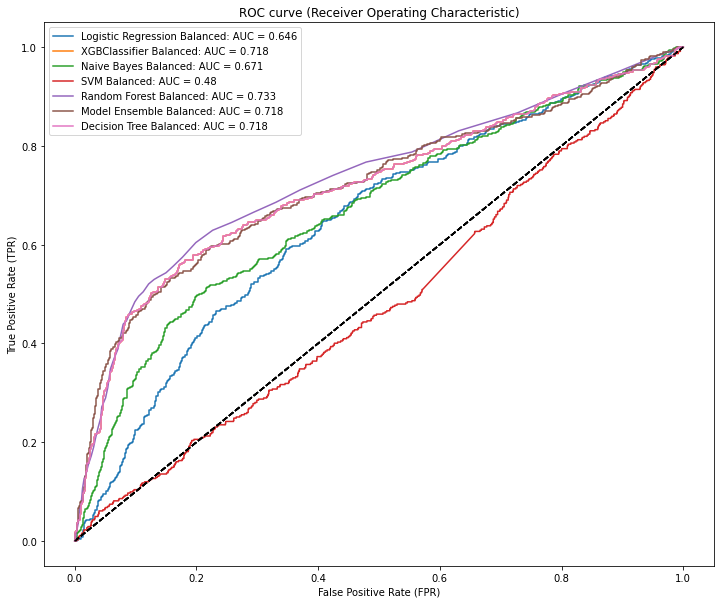

In [84]:
plt.figure(figsize=(12,10))

for test, pred, name in zip([y_test, y_test, y_test, y_test, y_test, y_test, y_test], [y_predProba_lr_bal[:,1], pred_XGB_prob_bal[:,1], pred_NB_prob_bal[:,1], pred_svc_prob_bal[:,1], pred_RF_prob_bal[:,1], y_pred_prob_bal[:,1], pred_XGB_prob_bal[:,1]], ['Logistic Regression Balanced','XGBClassifier Balanced', 'Naive Bayes Balanced','SVM Balanced', 'Random Forest Balanced','Model Ensemble Balanced', 'Decision Tree Balanced']):
    fpr, tpr, _ = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{}: AUC = {}'.format(name, round(roc_auc, 3)))
    plt.legend(loc='best')
    plt.plot([0,1],[0,1],color='black', linestyle='--')

plt.title('ROC curve (Receiver Operating Characteristic)')    
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')

plt.show()